Epoch [0/100], Loss: 1.9208
Epoch [10/100], Loss: 1.0414
Epoch [20/100], Loss: 0.9635
Epoch [30/100], Loss: 0.9509
Epoch [40/100], Loss: 0.9477
Epoch [50/100], Loss: 0.9465
Epoch [60/100], Loss: 0.9460
Epoch [70/100], Loss: 0.9457
Epoch [80/100], Loss: 0.9455
Epoch [90/100], Loss: 0.9453


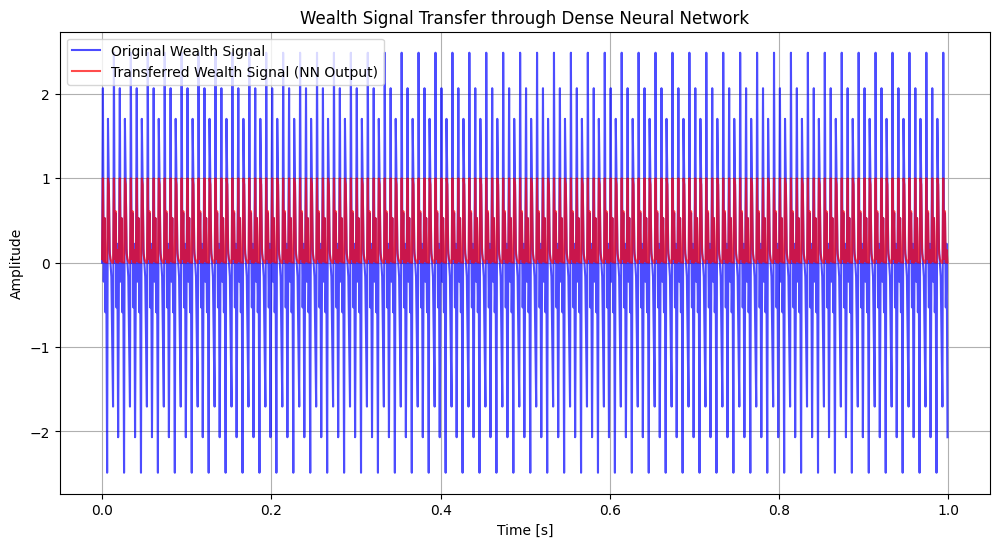

Epoch [0/100], Loss: 1.6159
Epoch [10/100], Loss: 1.0343
Epoch [20/100], Loss: 0.9657
Epoch [30/100], Loss: 0.9517
Epoch [40/100], Loss: 0.9479
Epoch [50/100], Loss: 0.9465
Epoch [60/100], Loss: 0.9459
Epoch [70/100], Loss: 0.9456
Epoch [80/100], Loss: 0.9454
Epoch [90/100], Loss: 0.9453


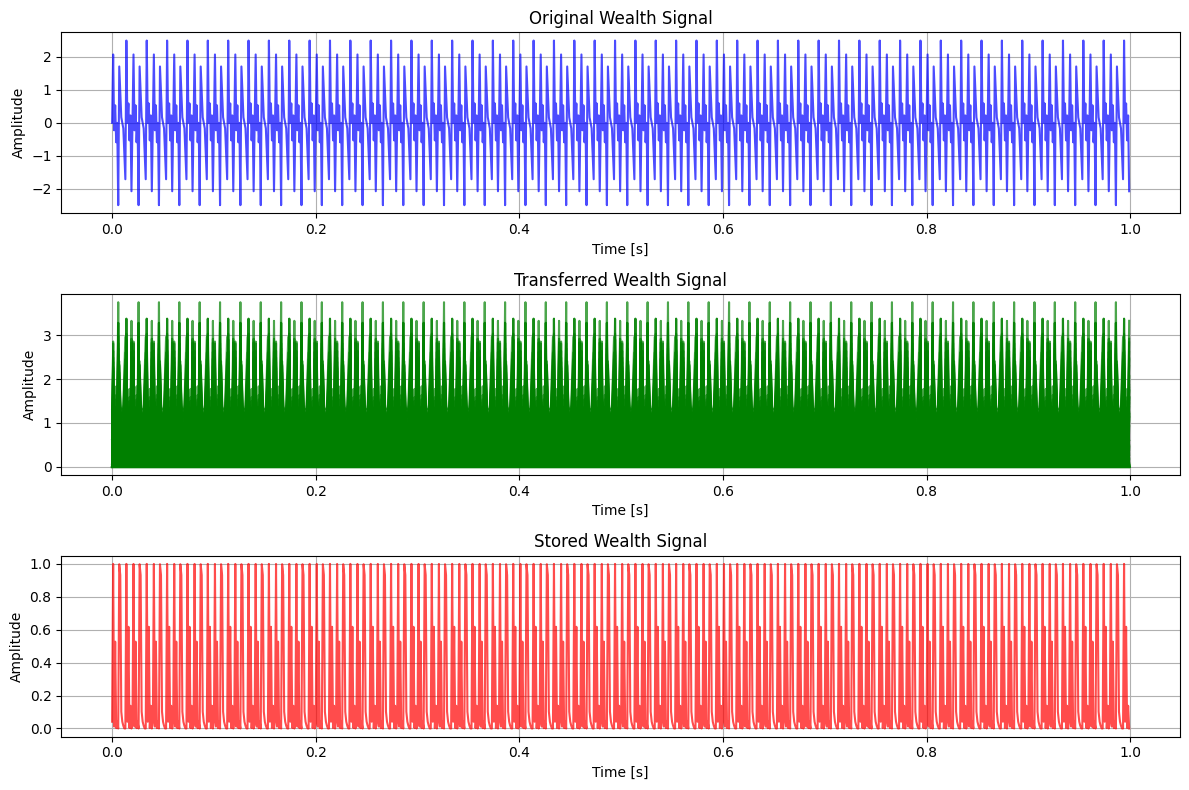

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Generate wealth signals
def generate_wealth_signal(freqs, t):
    """Generate wealth signal as a sum of sine waves."""
    signal = np.sum([np.sin(2 * np.pi * f * t) for f in freqs], axis=0)
    return signal

# Time variables
sampling_rate = 1000  # Samples per second
T = 1.0 / sampling_rate  # Sampling interval
t = np.linspace(0.0, 1.0, sampling_rate, endpoint=False)  # Time array

# Wealth-related frequencies (arbitrary for simulation)
wealth_frequencies = [150, 300, 450]  # Frequencies representing wealth signals
wealth_signal = generate_wealth_signal(wealth_frequencies, t)

# Step 2: Design Dense Neural Network for signal transfer
class WealthTransferNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WealthTransferNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Output is scaled between 0 and 1
        return x

# Define model parameters
input_size = 1  # Input dimension (scalar value per time point)
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Output dimension (transferred signal at each time point)

# Initialize the model
model = WealthTransferNN(input_size, hidden_size, output_size)

# Step 3: Transfer wealth signals through the neural network
# Convert the wealth signal to PyTorch tensor
wealth_signal_tensor = torch.tensor(wealth_signal, dtype=torch.float32).view(-1, 1)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Step 4: Train the network to simulate signal transfer
epochs = 100
for epoch in range(epochs):
    model.train()

    # Forward pass
    transferred_signal = model(wealth_signal_tensor)

    # Compute loss (we'll use the original signal as target for simplicity)
    loss = criterion(transferred_signal, wealth_signal_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Step 5: Visualize the original wealth signal and the transferred signal
with torch.no_grad():
    model.eval()
    transferred_signal = model(wealth_signal_tensor).numpy()

# Plot the original and transferred wealth signals
plt.figure(figsize=(12, 6))
plt.plot(t, wealth_signal, label='Original Wealth Signal', color='blue', alpha=0.7)
plt.plot(t, transferred_signal, label='Transferred Wealth Signal (NN Output)', color='red', alpha=0.7)
plt.title('Wealth Signal Transfer through Dense Neural Network')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Generate wealth signals
def generate_wealth_signal(freqs, t):
    """Generate wealth signal as a sum of sine waves."""
    signal = np.sum([np.sin(2 * np.pi * f * t) for f in freqs], axis=0)
    return signal

# Time variables
sampling_rate = 1000  # Samples per second
T = 1.0 / sampling_rate  # Sampling interval
t = np.linspace(0.0, 1.0, sampling_rate, endpoint=False)  # Time array

# Wealth-related frequencies (arbitrary for simulation)
wealth_frequencies = [150, 300, 450]  # Frequencies representing wealth signals
wealth_signal = generate_wealth_signal(wealth_frequencies, t)

# Step 2: Design a model with transfer and storage layers
class WealthTransferAndStorageNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WealthTransferAndStorageNN, self).__init__()
        self.transfer_layer = nn.Linear(input_size, hidden_size)
        self.storage_layer = nn.Linear(hidden_size, output_size)  # Second layer for storage

    def forward(self, x):
        # Transfer phase
        transferred_signal = torch.relu(self.transfer_layer(x))
        # Storage phase
        stored_signal = torch.sigmoid(self.storage_layer(transferred_signal))
        return transferred_signal, stored_signal

# Define model parameters
input_size = 1  # Input dimension (scalar value per time point)
hidden_size = 64  # Number of neurons in the hidden (transfer) layer
output_size = 1  # Output dimension (stored signal at each time point)

# Initialize the model
model = WealthTransferAndStorageNN(input_size, hidden_size, output_size)

# Step 3: Transfer and store wealth signals through the neural network
# Convert the wealth signal to PyTorch tensor
wealth_signal_tensor = torch.tensor(wealth_signal, dtype=torch.float32).view(-1, 1)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Step 4: Train the network
epochs = 100
for epoch in range(epochs):
    model.train()

    # Forward pass through the transfer and storage layers
    transferred_signal, stored_signal = model(wealth_signal_tensor)

    # Compute loss (we'll use the original signal as target for simplicity)
    loss = criterion(stored_signal, wealth_signal_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Step 5: Visualize the original wealth signal, transferred signal, and stored signal
with torch.no_grad():
    model.eval()
    transferred_signal, stored_signal = model(wealth_signal_tensor)

# Convert transferred and stored signals to numpy arrays for plotting
transferred_signal = transferred_signal.numpy()
stored_signal = stored_signal.numpy()

# Plot the original, transferred, and stored wealth signals
plt.figure(figsize=(12, 8))

# Original wealth signal
plt.subplot(3, 1, 1)
plt.plot(t, wealth_signal, label='Original Wealth Signal', color='blue', alpha=0.7)
plt.title('Original Wealth Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Transferred wealth signal
plt.subplot(3, 1, 2)
plt.plot(t, transferred_signal, label='Transferred Wealth Signal (NN Output)', color='green', alpha=0.7)
plt.title('Transferred Wealth Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Stored wealth signal
plt.subplot(3, 1, 3)
plt.plot(t, stored_signal, label='Stored Wealth Signal (After Transfer)', color='red', alpha=0.7)
plt.title('Stored Wealth Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()